Estimating the value of a used car is one of the main everyday challenges in the automotive business. We believe that the sales price of a car is not only based on the value of the product itself, but is also heavily influenced by things like market trends, current availability, and politics.
With this challenge, we hope to raise some interest in this exciting topic and also gain some insight into what the main factors are that drive the value of a used car.

The data provided consists of almost 5000 real BMW cars that were sold via a b2b auction in 2018. The price shown in the table is the highest bid that was reached during the auction.

We have already done some data cleanup and filtered out cars with engine damage etc. However there may still be minor damages like scratches, but we do not have more information about that.

We have also extracted 8 criteria based on the equipment of cars that we think might have a good impact on the value of a used car. These criteria have been labeled feature1 to feature8 and are shown in the data below.

## 0. Importing Libraries

In [2]:
!pip install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import bisect

import warnings
warnings.filterwarnings('ignore')


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


##  1. Reading data

In [9]:
df = pd.read_csv("bmw_pricing_challenge.csv")

In [21]:
df.head(20)

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01
5,BMW,335,152352,225,2011-05-01,petrol,black,convertible,True,True,False,False,True,True,True,True,17100,2018-02-01
6,BMW,325,205219,145,2009-05-01,diesel,grey,convertible,True,True,False,False,True,True,True,True,12400,2018-02-01
7,BMW,118,115560,105,2009-08-01,petrol,white,convertible,True,True,False,False,False,True,True,False,6100,2018-02-01
8,BMW,Z4,123886,125,2004-07-01,petrol,black,convertible,True,False,False,False,False,True,True,False,6200,2018-03-01
9,BMW,320,139541,135,2013-06-01,diesel,white,convertible,False,False,False,False,True,False,True,False,17300,2018-03-01


In [8]:
df.shape

(4843, 18)

In [9]:
df.describe()

,mileage,engine_power,price
count,4.843000e+03,4843.00000,4843.000000
mean,1.409628e+05,128.98823,15828.081767
std,6.019674e+04,38.99336,9220.285684
min,-6.400000e+01,0.00000,100.000000
25%,1.029135e+05,100.00000,10800.000000
50%,1.410800e+05,120.00000,14200.000000
75%,1.751955e+05,135.00000,18600.000000
max,1.000376e+06,423.00000,178500.000000


## 2. Exploratory Data Analysis

### 2.1. Missing Values

Check if the dataset contains any missing values.

In [10]:
df.isnull().values.any()


False

### 2.2. Distribution of the target variable

Plot the probabilistic distribution of the target variable.

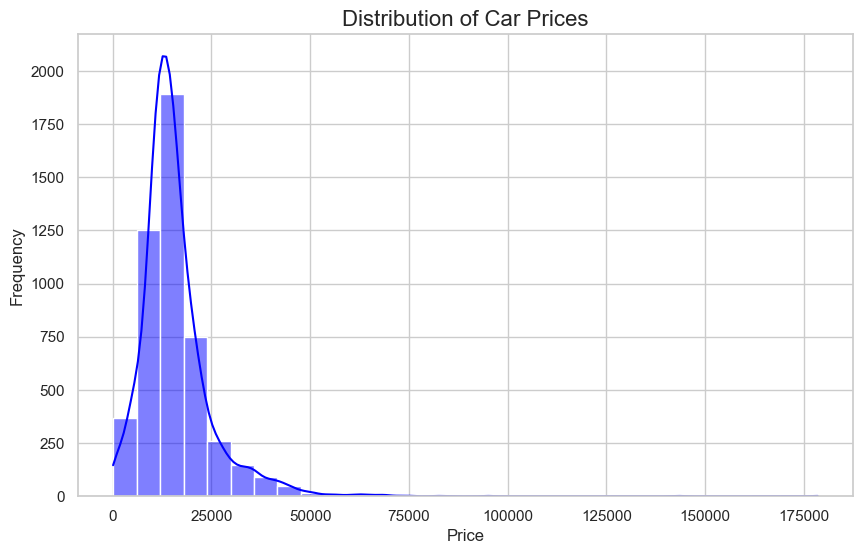

In [12]:

# Plot the distribution of the target variable (assuming the target is 'price')

plt.figure(figsize=(10,6))

# Plotting the histogram with KDE (Kernel Density Estimation)
sns.histplot(df['price'], kde=True, bins=30, color='blue')

# Add labels and title
plt.title('Distribution of Car Prices', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

### 2.3. Distribution of numerical variables

Plot the probabilistic distribution of the numerical features.

In [8]:


# Plot the count of 'True' and 'False' values in 'feature_1'
df['feature_1'].value_counts().plot(kind='bar', color=['blue', 'red'])

# Add title and labels
plt.title('Distribution of Feature_1 (True vs False)')
plt.xlabel('Feature_1')
plt.ylabel('Count')

# Show the plot
plt.show()




NameError: name 'df' is not defined

### 2.4. Histogram of categorical variables

Plot the histogram of the categorical features.

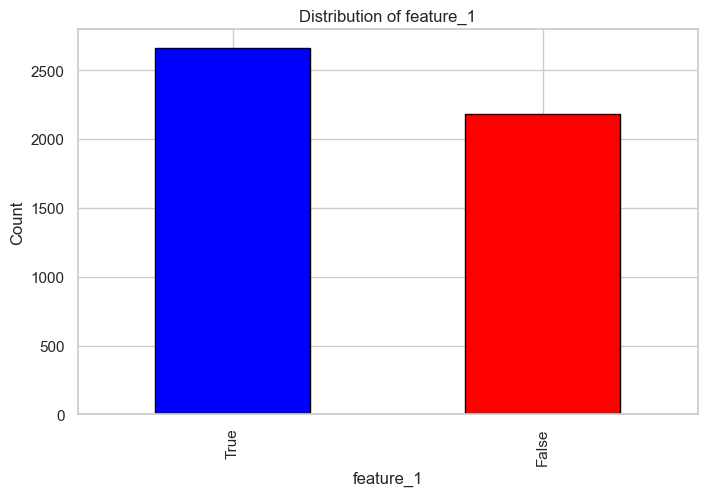

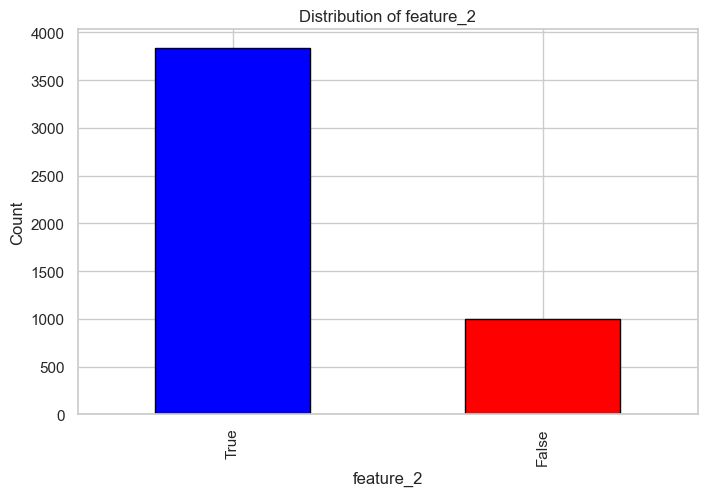

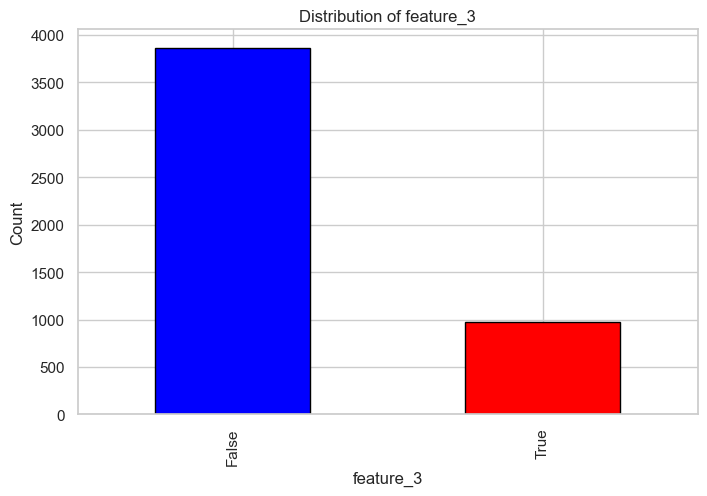

In [20]:
# List of categorical feature names (replace with actual categorical column names)
categorical_columns = ['feature_1', 'feature_2', 'feature_3']  # Update with actual names

# Loop through the categorical features and plot their distribution
for feature in categorical_columns:
    plt.figure(figsize=(8, 5))
    
    # Plot the bar chart with custom colors for True (blue) and False (red)
    df[feature].value_counts().plot(kind='bar', color=['blue', 'red'], edgecolor='black')
    
    # Add title and labels
    plt.title(f'Distribution of {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Count')
    
    # Show the plot
    plt.show()



## 3. Data Splitting

Split the dataset into 2 training and test datasets.

In [14]:



X = df.drop('price', axis=1)  # we have to drop the target column 'price' 
y = df['price']  # so we set 'price' as the target variable 

# we split the dataset into 80% for train and 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




## 4. Feature Engineering

### 4.1. Removing non-predictive features

Remove any unnecessary feature.

In [22]:
#We can see in the database that 'maker_key', 'car_type', 'feature_3', 'feature_4', 'feature_7' are always the same (or mainly), so we can deduce that they dont have an impact on the prediction
# List of unnecessary features to drop
features_to_drop = ['maker_key', 'car_type', 'feature_3', 'feature_4', 'feature_7']

# Drop the unnecessary features
df_cleaned = df.drop(columns=features_to_drop)



  model_key  mileage  engine_power registration_date    fuel paint_color  \
0       118   140411           100        2012-02-01  diesel       black   
1        M4    13929           317        2016-04-01  petrol        grey   
2       320   183297           120        2012-04-01  diesel       white   
3       420   128035           135        2014-07-01  diesel         red   
4       425    97097           160        2014-12-01  diesel      silver   

   feature_1  feature_2  feature_5  feature_6  feature_8  price     sold_at  
0       True       True       True       True      False  11300  2018-01-01  
1       True       True      False       True       True  69700  2018-02-01  
2      False      False       True      False      False  10200  2018-02-01  
3       True       True       True       True       True  25100  2018-02-01  
4       True       True      False       True       True  33400  2018-04-01  


### 4.2. Creating new features

Creating polynomial features for numerical columns

In [12]:
# Separate numerical and boolean columns
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
boolean_cols = df_cleaned.select_dtypes(include=['bool']).columns

# Generate polynomial features for numerical columns
poly = PolynomialFeatures(degree=2, include_bias=False)
numerical_poly = poly.fit_transform(df_cleaned[numerical_cols])

# Create a DataFrame with the polynomial features
numerical_poly_df = pd.DataFrame(numerical_poly, columns=poly.get_feature_names_out(numerical_cols))

# Convert boolean columns to integer (if necessary) and concatenate with polynomial features
boolean_df = df_cleaned[boolean_cols].astype(int)
df_final = pd.concat([numerical_poly_df, boolean_df], axis=1)

### 4.3. Scaling numerical variables

In [29]:

# Identify only the numerical columns
X_numerical = df.select_dtypes(include=['float64', 'int64'])  # Selecting only numerical columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical data
X_scaled = scaler.fit_transform(X_numerical)

# Convert the scaled data back into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X_numerical.columns)



### 4.4. Categorical variables encoding

Convert categorical columns into numerical columns using label encoding or one-hot encoding.

In [30]:
# Initialize the scaler
scaler = StandardScaler()


df_final[numerical_cols] = scaler.fit_transform(df_final[numerical_cols])

### 4.5. Converting boolean columns

In [31]:
# Convert boolean columns to integers 
boolean_cols = df_cleaned.select_dtypes(include=['bool']).columns  # Get all boolean columns

# Apply conversion
df_cleaned[boolean_cols] = df_cleaned[boolean_cols].astype(int)

## 5. Linear Regression

Fit a linear regression model on the training set. Evaluate the model on the testing set. Use the $R^2$ as an evaluation metric.

In [34]:

# Remove categorical columns from the training and test datasets
X_train = X_train.select_dtypes(include=['float64', 'int64'])  # Keep only numerical columns
X_test = X_test.select_dtypes(include=['float64', 'int64'])    # Keep only numerical columns

# Initialize the linear regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Predict the values on the test data
y_pred = linear_model.predict(X_test)

# Calculate R^2 score on the test data
r2 = r2_score(y_test, y_pred)

# Print the R^2 score
print(f'R^2 score on the test set: {r2:.4f}')



R^2 score on the test set: 0.5652


Plot feature importance/weight.

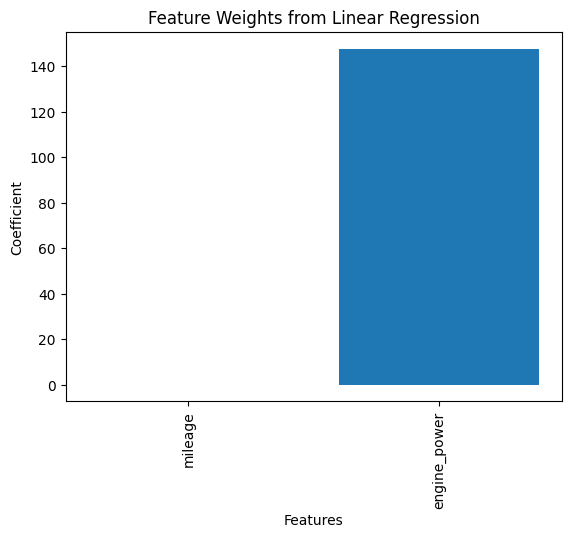

In [35]:

# Get the coefficients of the model
coefficients = linear_model.coef_

# Plot the coefficients
plt.bar(range(len(coefficients)), coefficients)
plt.xticks(range(len(coefficients)), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Weights from Linear Regression')
plt.show()


## 6. Ridge

Fit a ridge regression model on the training set. Use cross-validation in order to tune the regularization parameter of the ridge model. Evaluate the model on the testing set. Use the $R^2$ as an evaluation metric.

In [36]:

# Define the parameter grid for alpha (regularization strength)
param_grid = {'alpha': np.logspace(-6, 6, 13)}  # Range of alpha values

# Initialize the Ridge regression model
ridge_model = Ridge()

# Use GridSearchCV to perform cross-validation and tune the alpha parameter
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='r2')

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best alpha from the grid search
best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha (regularization parameter): {best_alpha}')

# Predict the target variable on the test set
y_pred = grid_search.predict(X_test)

# Calculate the R^2 score on the test data
r2 = r2_score(y_test, y_pred)

# Print the R^2 score
print(f'R^2 score on the test set: {r2:.4f}')


Best alpha (regularization parameter): 10000.0
R^2 score on the test set: 0.5652


Plot feature importance/weight.

## 7. Lasso

Fit a lasso regression model on the training set. Use cross-validation in order to tune the regularization parameter of the ridge model. Evaluate the model on the testing set. Use the $R^2$ as an evaluation metric.

In [39]:


# Split the dataset into features (X) and target (y)
X = df_cleaned.drop('price', axis=1)  # Replace 'target_column' with the actual target column name
y = df_cleaned['price']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Lasso regression model with cross-validation to tune alpha (regularization parameter)
lasso = LassoCV(cv=5, random_state=42)  # cv=5 means 5-fold cross-validation
lasso.fit(X_train, y_train)

# Get the best alpha from cross-validation
best_alpha = lasso.alpha_
print(f"Best alpha (regularization parameter): {best_alpha}")

# Evaluate the model on the testing set using R^2
y_pred = lasso.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R^2 on testing set: {r2:.4f}")


ValueError: could not convert string to float: 'X3'

Plot feature importance/weight.

In [22]:
# Get the feature names and their corresponding coefficients (weights)
feature_names = X_train.columns  # Assuming X_train is a pandas DataFrame
coefficients = lasso.coef_

# Plotting the feature importance/weights
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Feature Weights')
plt.title('Feature Importance/Weights in Lasso Regression')
plt.show()

NameError: name 'lasso' is not defined